In [3]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial import ConvexHull

#### Computing a convex hull of a set of points:

In [3]:
def plot_hull(points):
    hull = ConvexHull(points)
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 3))
    for ax in (ax1, ax2):
        ax.plot(points[:, 0], points[:, 1], '.', color='k')
        if ax == ax1:
            ax.set_title('Points')
        else:
            ax.set_title('Convex hull')
            for simplex in hull.simplices:
                ax.plot(points[simplex, 0], points[simplex, 1], 'c')
            ax.plot(points[hull.vertices, 0], points[hull.vertices, 1], 'o', mec='r', color='none', lw=1, markersize=10)
        ax.set_xticks(range(10))
        ax.set_yticks(range(10))
    plt.show()
    return hull




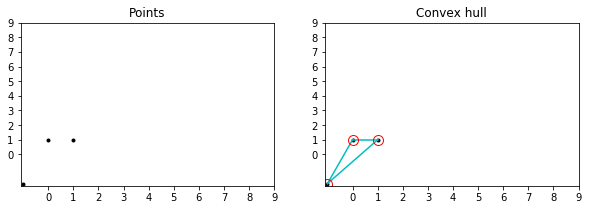

In [4]:
#points = np.random.randint(0, 10, size=(15, 2))  # Random points in 2-D
points = np.array([[0,1], [1,1], [-1,-2]])
hull = plot_hull(points)

In [9]:
print(hull.simplices)

[[1 2]
 [0 2]
 [0 1]]


#### Scaling the convex hull:

In [4]:
def scale_hull(points, m): #Add defenses
    scaled_points = m*points
    return plot_hull(scaled_points)

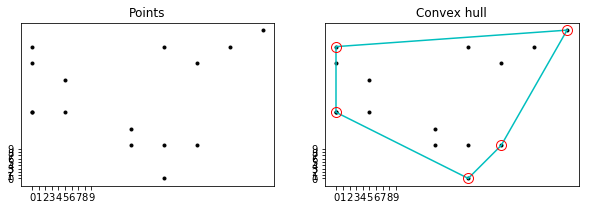

In [6]:
m = 5
scale_hull(points, m)

#### Counting interior points

In [12]:
#TO DO -- import polytope as pc - use pip or import from source
import polytope.polytope as pc

In [21]:
def enumerate_integral_points(poly):
    """Return all points in `poly` that have integer coordinates.

    @param poly: polytope
    @type poly: `polytope.polytope.Region` or
        `polytope.polytope.Polytope`
    @return: coordinates of `m` points as `d X m` array,
        where `d` the dimension
    @rtype: `numpy.ndarray`
    """
    a, b = poly.bounding_box
    a_int = np.floor(a)
    b_int = np.ceil(b)
    intervals = list(zip(a_int.flatten(), b_int.flatten()))
    box = pc.box2poly(intervals)
    res = [int(b - a + 1) for a, b in intervals]
    grid, _ = pc.grid_region(box, res=res)
    inside = poly.contains(grid)
    return grid[:, inside]

In [23]:
hull = pc.qhull(points)
        # `hull` is an instance of the class `polytope.polytope.Polytope`,
        # which is for representing convex polytopes
integral_points = enumerate_integral_points(hull)
print(integral_points)

[[-1.  0.  0.  1.]
 [-2.  0.  1.  1.]]


### Asymptotic Riemann Roch

In [4]:
points = np.array([[0,1], [1,1], [-1,-2]])

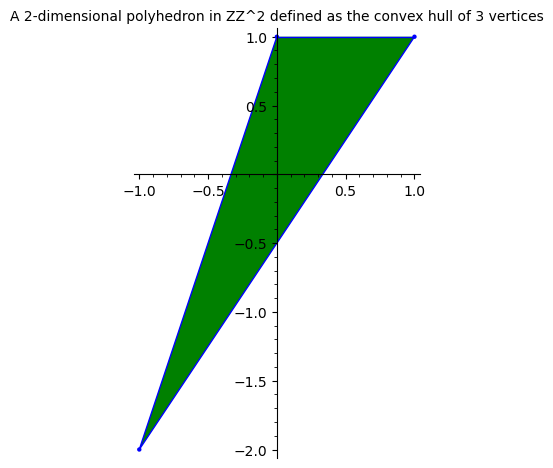

In [5]:
P = Polyhedron(vertices=points)
P

In [6]:
p = P.ehrhart_polynomial(engine='latte')

FeatureNotPresentError: count is not available.
Executable 'count' not found on PATH.
No equivalent system packages for pip are known to Sage.
Further installation instructions might be available at https://www.math.ucdavis.edu/~latte/software.php.

In [ ]:
#Take m_1 < m_2, as powers of anticanonical bundle for which we check ampleness
def is_very_ample(m_1, h_1, m_2, h_2, m_3, h_3, k):
    #compute gradient of points one and two
    y_1, y_2, y_3 = h_1 - (m_1**2)*((k**2)/2),h_2 - (m_2**2)*((k**2)/2), h_3-(m_3**2)*((k**2)/2)
    grad_1 =(y_2 - y_1)/(m_2 - m_1)
    grad_2 = (y_3 -y_2)/(m_3 - m_2)
    if grad_1 == grad_2:
        return True
    else:
        return False
    
def get_ample_index(vertices, antican_dsq):
    P = Polyhedron(vertices=points)
    p = P.ehrhart_polynomial(engine='latte')
    very_ample = False
    m = 0
    while very_ample == False:
        print(m)
        m += 1
        h_1 = p(m)
        h_2 = p(m+1)
        h_3 = p(m+2)
        very_ample = is_very_ample(m, h_1, m+1, h_2, m+2, h_3, antican_dsq)
    return m